## Voting Classifier

# What is Voting classifier?

It is an ensemble learning technique where multiple models vote on the final prediction.

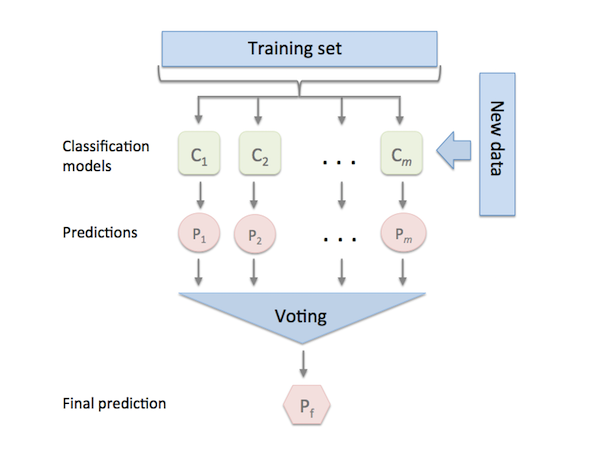

- Hard Voting
- Soft Voting

In [1]:
# libraries
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import VotingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# loading data
data = load_breast_cancer()
X = data.data
y = data.target

In [5]:
# Splitting data into train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [6]:
# defining individual model 
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression(solver='lbfgs', max_iter=3000)

In [7]:
# Creating a voting classifier 

voting_clf = VotingClassifier(estimators=[('dt', dt), ('knn', knn), ('lr',lr)], voting = 'hard')

In [8]:
# Fitting the classifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression(max_iter=3000))])

In [9]:
#Predicting on test set
y_pred = voting_clf.predict(X_test)

In [10]:
# Evaluating 
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9766081871345029

In [11]:
# Training individual classifiers
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Making predictions
dt_pred = dt.predict(X_test)
knn_pred = knn.predict(X_test)
lr_pred = lr.predict(X_test)

# Evaluating accuracy
dt_acc = accuracy_score(y_test, dt_pred)
knn_acc = accuracy_score(y_test, knn_pred)
lr_acc = accuracy_score(y_test, lr_pred)

print(f"Decision Tree Accuracy: {dt_acc:.2f}")
print(f"KNN Accuracy: {knn_acc:.2f}")
print(f"Logistic Regression Accuracy: {lr_acc:.2f}")


Decision Tree Accuracy: 0.94
KNN Accuracy: 0.96
Logistic Regression Accuracy: 0.98


Decision Tree: 0.94
KNN: 0.96
Logistic Regression: 0.98
Voting Classifier: 0.98